<a href="https://colab.research.google.com/github/Lavan1999/Dataset-16_JobPlacement_AdaBoostClassifier/blob/main/16_Job_placement_supervisedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

#import pymongo
from google.colab import drive

#Statistic
from scipy import stats

#Machine Learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler


# **Connections**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **DataFrame**

In [ ]:
file_path = '/content/drive/My Drive/MDTM15/Raw Datasets/job_placement.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


# **DataFrame observation**


Supervised [Classification]

Dependent column

Independent column

Continuous column

Category column

In [ ]:
print(df.columns)

Index(['gender', 'age', 'stream', 'college_name', 'placement_status', 'salary',
       'gpa', 'years_of_experience', 'id'],
      dtype='object')


In [ ]:
# Dependent - conversion_status
# Independent - occupation, age,	education_level,	marital_status,	communication_channel,	call_month,	call_day,	call_duration,	call_frequency,	previous_campaign_outcome

continuous_columns = ["salary"]
category_columns = ["gender", "age", "stream", "college_name", "placement_status",
                    "gpa", "years_of_experience"]

#Supervised Classification

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [ ]:
df.isnull().sum()

gender                   0
age                      0
stream                   0
college_name             0
placement_status         0
salary                   0
gpa                      0
years_of_experience      0
id                     700
dtype: int64

In [ ]:
df.head(1)

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0


In [ ]:
len(df.salary.unique())

13

In [ ]:
df.years_of_experience.unique()

array([ 2.,  1.,  3., nan])

In [ ]:
df.age.unique()

array([25, 24, 26, 23])

In [ ]:
df.gpa.unique()

array([3.7, 3.6, 3.8, 3.5, 3.9, 3.4])

In [ ]:
df.drop(['degree'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df[df['years_of_experience']==0]

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
544,Female,24,Mechanical Engineering,University of California--Santa Cruz,Placed,60000,3.7,0.0


In [ ]:
df['years_of_experience'].fillna(0, inplace=True)

In [ ]:
df

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
695,Male,23,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,Female,26,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,Male,24,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,Female,23,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
df.corr()

<ipython-input-70-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,salary,gpa,years_of_experience
age,1.000000,0.022827,0.071738,-0.019132
salary,0.022827,1.000000,0.226929,0.358519
gpa,0.071738,0.226929,1.000000,0.752727
years_of_experience,-0.019132,0.358519,0.752727,1.000000


# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,salary
Conclusion,"H0 is rejected, Ha is accepted, There is a sig..."
H0_accepted,68
H0_rejected,72
Population Mean,52474.285714
Sample Means,{52422.857142857145}


In [ ]:
comperativeColumn_result

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
gender,NaN,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship
age,There is a relationship,NaN,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship
stream,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship
college_name,There is a relationship,There is a relationship,There is a relationship,NaN,There is a relationship,There is no relationship,There is a relationship,There is a relationship
placement_status,There is no relationship,There is no relationship,There is a relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is a relationship
salary,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
gpa,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,NaN,There is a relationship
years_of_experience,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,NaN


In [ ]:
df.corr()

<ipython-input-74-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,salary,gpa,years_of_experience
age,1.000000,0.022827,0.071738,-0.019132
salary,0.022827,1.000000,0.226929,0.358519
gpa,0.071738,0.226929,1.000000,0.752727
years_of_experience,-0.019132,0.358519,0.752727,1.000000


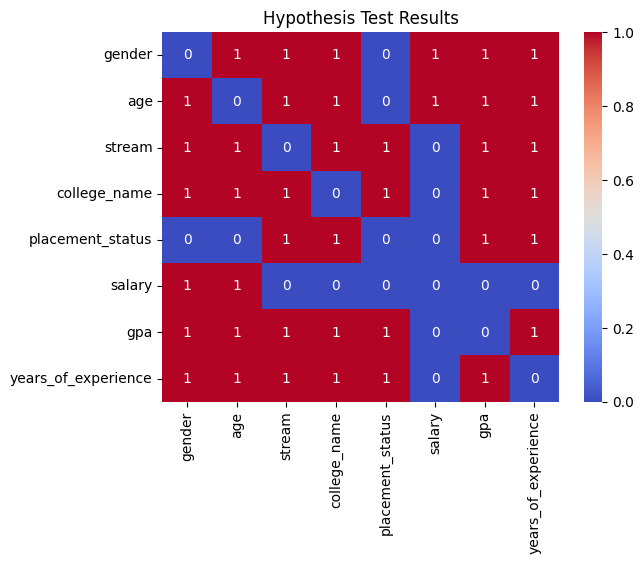

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-76-ebcbbf98ef30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-78-ebcbbf98ef30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Preprocessing**

In [ ]:
df.head(3)

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0


In [ ]:
# Replacing categorical values with numerical
encode=OrdinalEncoder()
df.gender=encode.fit_transform(df[["gender"]])
df.stream=encode.fit_transform(df[["stream"]])
df.college_name=encode.fit_transform(df[["college_name"]])
df.placement_status=encode.fit_transform(df[["placement_status"]])

In [ ]:
df.head()

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1.0,25,0.0,5.0,1.0,60000,3.7,2.0
1,0.0,24,1.0,7.0,1.0,65000,3.6,1.0
2,1.0,26,4.0,11.0,1.0,58000,3.8,3.0
3,0.0,23,3.0,43.0,0.0,0,3.5,2.0
4,1.0,24,0.0,9.0,1.0,62000,3.9,2.0


# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
x = df.drop(['placement_status'], axis = 1)
y = df.placement_status

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((560, 7), (560,), (140, 7), (140,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
y_test,y_pred

(81     1.0
 364    1.0
 59     1.0
 318    0.0
 256    1.0
       ... 
 25     0.0
 623    1.0
 388    1.0
 324    1.0
 539    1.0
 Name: placement_status, Length: 140, dtype: float64,
 array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 1.]))

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
accuracy, cm

(1.0,
 array([[ 22,   0],
        [  0, 118]]))

In [ ]:
cm_df = pd.DataFrame(cm,columns=['predicted 0','predicted 1'])
cm_df.rename(index={0:'Actual_0', 1:'Actual_1'}, inplace=True)
cm_df

,predicted 0,predicted 1
Actual_0,22,0
Actual_1,0,118


In [ ]:
x.head(1)

,gender,age,stream,college_name,salary,gpa,years_of_experience
0,1.0,25,0.0,5.0,60000,3.7,2.0


In [ ]:
child = np.array([[1.0,25,0.0,5.0,60000,3.7,2.0]])
prediction = model.predict(child)
print(y_pred)

[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def Logistic(self):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def SupertVector(self):
    from sklearn import svm
    model = svm.SVC().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Support vector machines accuracy score: ',accuracy)
    return accuracy

  def KNeighborsClassifier(self):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('KNeighbors Classifier accuracy score: ',accuracy)
    return accuracy

  def GaussianNaiveBayes(self):
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Naive Bayes Classifier accuracy score: ",accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def SGDClassifier(self):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("SGD Classifier accuracy score: ",accuracy)
    return accuracy

  def MLPClassifier(self):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Neural network models accuracy score: ",accuracy)
    return accuracy

  def NearestCentroid(self):
    from sklearn.neighbors import NearestCentroid
    model = NearestCentroid().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Nearest Neighbors accuracy score: ",accuracy)
    return accuracy

  def LGBMClassifier(self):
    from lightgbm import LGBMClassifier
    model = LGBMClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("LGBM Classifier accuracy score: ",accuracy)
    return accuracy

In [ ]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'SupertVector': model.SupertVector(),
    'KNeighborsClassifier' : model.KNeighborsClassifier(),
    'GaussianNaiveBayes' : model.GaussianNaiveBayes(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'SGDClassifier' : model.SGDClassifier(),
    'MLPClassifier' : model.MLPClassifier(),
    'NearestCentroid' : model.NearestCentroid(),
    #'LGBMClassifier' : model.LGBMClassifier(),
    #'Logistic' : model.Logistic()
    }

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")

Decision Tree Classifier accuracy score:  1.0
Random Forest Classifier accuracy score:  1.0
Support vector machines accuracy score:  1.0
KNeighbors Classifier accuracy score:  1.0
Naive Bayes Classifier accuracy score:  1.0
Gradient Boosting Classifier accuracy score:  1.0
AdaBoost Classifier accuracy score:  1.0
SGD Classifier accuracy score:  1.0
Neural network models accuracy score:  1.0
Nearest Neighbors accuracy score:  1.0

Maximum accuracy score: 1.0000 achieved by DecisionTree classifier.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier().fit(x_train,y_train)

example = np.array([[1.0,25,0.0,5.0,60000,3.7,2.0]])
y_pred = model.predict(example)

print(y_pred)


[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names

